# Importing required libraries

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing require libraries
import os #os module in Python provides functions for interacting with the operating system
import time # for time access and conversions
from wordcloud import WordCloud, STOPWORDS #For data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
import numpy as np #used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
import plotly.express as px #Plotly Express is the easy-to-use, high-level interface to Plotly
import pandas as pd #pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python
import matplotlib.pyplot as plt #comprehensive library for creating interactive visualizations in Python
import seaborn as sns #open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
import ast #ast module helps Python applications to process trees of the Python abstract syntax grammar.

# Finding and setting working directory

In [4]:
os.getcwd() #find current working directory

'/content'

In [5]:
inpDir = '/content/drive/MyDrive/working_dir/input_data' # directory where data is stored
outDir = '/content/drive/MyDrive/working_dir/input_data' # directory for storing outputs
csvName = 'movies_metadata.csv' # name of the csv file
tmdbURL = 'https://image.tmdb.org/t/p/original/' # Url for posters at tmdb
RANDOM_STATE = 24

# Set parameters for decoration of plots

In [6]:
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (14,5),
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
         } # used to set parameters for decoration of plots
CMAP = plt.cm.brg #choosing colormaps
plt.rcParams.update(params) # updating some properties in matplotfile using rcParams

# Main dataset importation

In [7]:
df = pd.read_csv(os.path.join(inpDir, csvName), low_memory=False) #movies_metadata.csv data importation

# Dataset exploration

In [8]:
df.head() #exploring atribute names

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
df.columns #getting an array of all collum names of the dataset movies_metadata.csv

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
df.info()# movies_metadata.csv dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [11]:
df.isna().sum() # sum of null values in each atrribute in movies_metadata.csv dataset

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

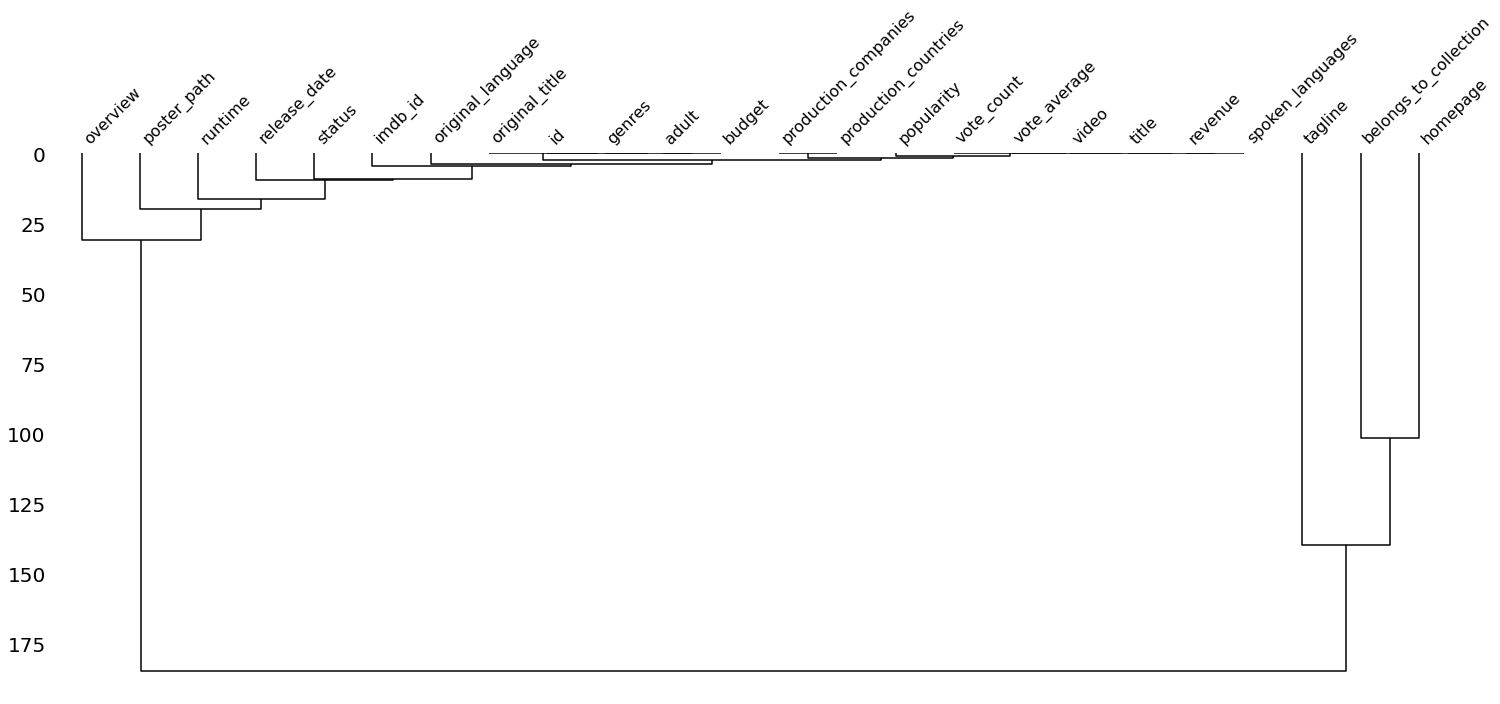

In [12]:
import missingno as msno #libraryfor ploting mising values
msno.dendrogram(df) #missing values dendrogram

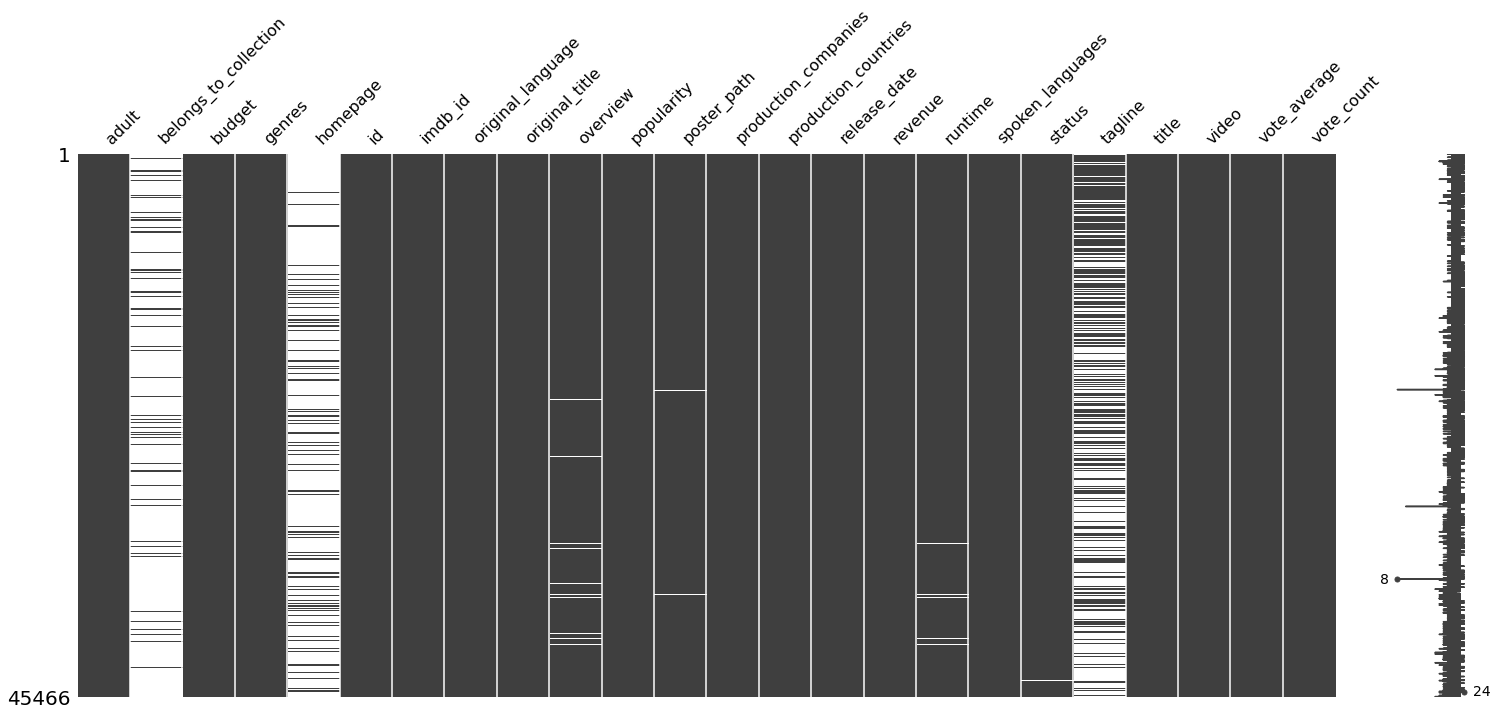

In [13]:
msno.matrix(df) #missiing values matrix

In [14]:
def top_10(data, column):
    temp_data = data.apply(lambda x: pd.Series(x[column], dtype='object'),axis=1).stack().reset_index(level=1, drop=True)
    a = temp_data.value_counts().reset_index()
    a.rename(columns={0: 'Value'})
    fig = px.bar(a.iloc[:10][::-1], x=0, y='index', orientation='h', 
                 title="A Graph of Top 5 {}".format(column),color_discrete_sequence=['#747B7C '])
    fig.show() 

In [15]:
top_10(df,'original_language') #top 10 original langeuage use in movies in movies_metadata.csv dataset

In [16]:
top_10(df,'production_countries') #top 10 production counties in movies_metadata.csv dataset

In [17]:
top_10(df,'genres') #top 10 geners in movies_metadata.csv dataset

In [18]:
df.drop(['belongs_to_collection','homepage','tagline'], axis = 1, inplace = True) #droping attributes with many missing values

In [19]:
df= df.dropna(subset=[ 'original_language','runtime','popularity','poster_path','release_date',
                      'imdb_id','overview','status']) #droping rows with missing values

In [20]:
df.isnull().sum() #checking missing values

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44048 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44048 non-null  object 
 1   budget                44048 non-null  object 
 2   genres                44048 non-null  object 
 3   id                    44048 non-null  object 
 4   imdb_id               44048 non-null  object 
 5   original_language     44048 non-null  object 
 6   original_title        44048 non-null  object 
 7   overview              44048 non-null  object 
 8   popularity            44048 non-null  object 
 9   poster_path           44048 non-null  object 
 10  production_companies  44048 non-null  object 
 11  production_countries  44048 non-null  object 
 12  release_date          44048 non-null  object 
 13  revenue               44048 non-null  float64
 14  runtime               44048 non-null  float64
 15  spoken_languages   

In [22]:
#dataype conversion 
df['budget'] = df['budget'].astype(float)
df['popularity'] = df['popularity'].astype(float)
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d', errors='coerce')
df['runtime'] = df['runtime'].astype(float)

In [23]:
df.dtypes

adult                           object
budget                         float64
genres                          object
id                              object
imdb_id                         object
original_language               object
original_title                  object
overview                        object
popularity                     float64
poster_path                     object
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
title                           object
video                           object
vote_average                   float64
vote_count                     float64
dtype: object

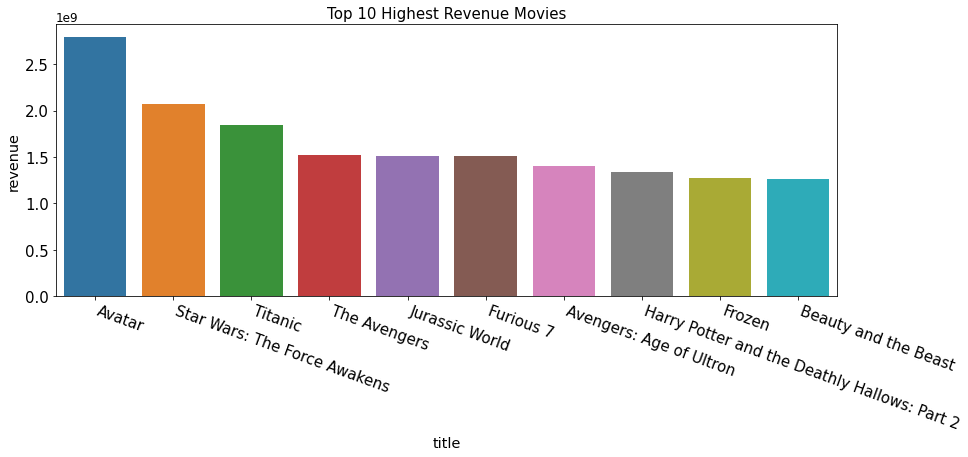

In [24]:
cols = ['title', 'revenue']
revenue_df = df.sort_values('revenue', ascending=False)[cols].set_index('title')
top_5 = revenue_df.head(10)
sns.barplot(data=top_5, x=top_5.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 10 Highest Revenue Movies', fontsize=15);

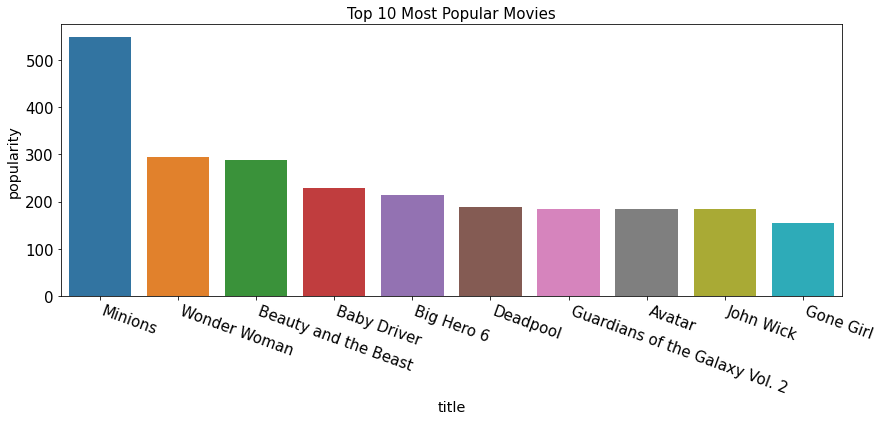

In [25]:
cols = ['title', 'popularity']
popularity_df = df.sort_values('popularity', ascending=False)[cols].set_index('title')
top_5 = popularity_df.head(10)
sns.barplot(data=top_5, x=top_5.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 10 Most Popular Movies', fontsize=15);

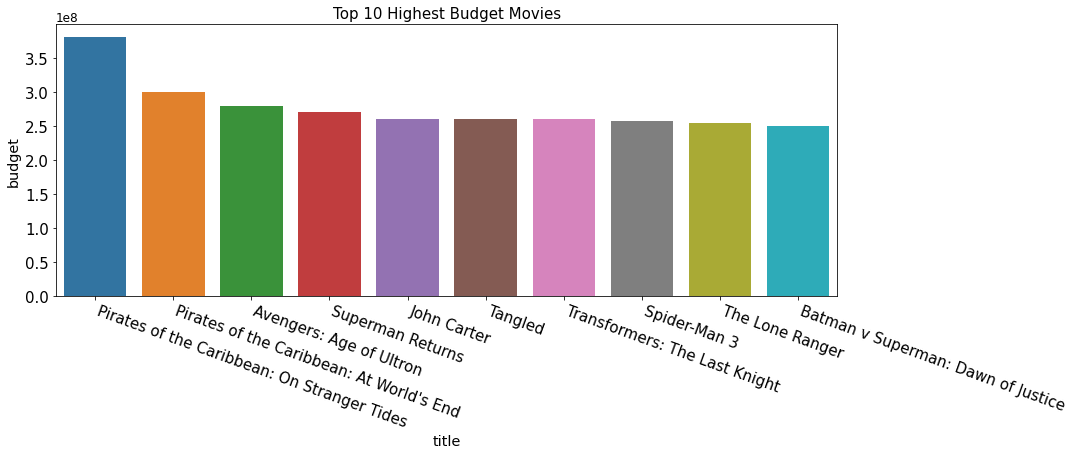

In [26]:
cols = ['title', 'budget']
budget_df = df.sort_values('budget', ascending=False)[cols].set_index('title')
top_5 = budget_df.head(10)
sns.barplot(data=top_5, x=top_5.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 10 Highest Budget Movies', fontsize=15);

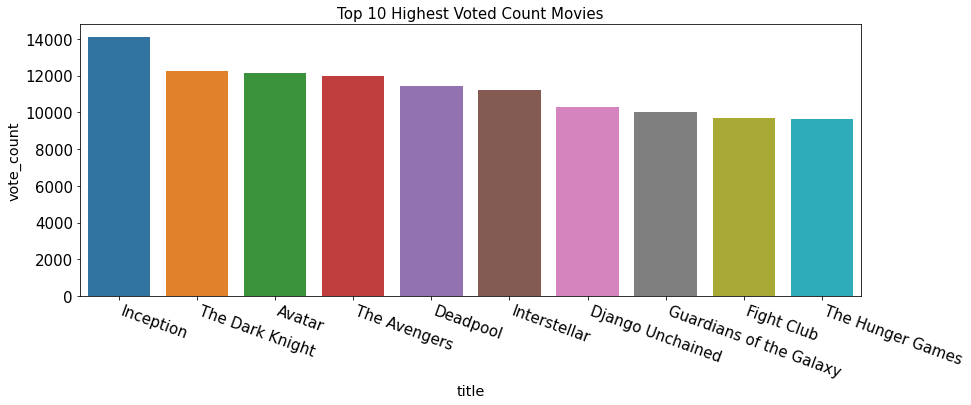

In [27]:
cols = ['title', 'vote_count']
vote_count_df = df.sort_values('vote_count', ascending=False)[cols].set_index('title')
top_5 = vote_count_df.head(10)
sns.barplot(data=top_5, x=top_5.index, y='vote_count');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 10 Highest Voted Count Movies', fontsize=15);

In [28]:
df.corr() #investigating relationships

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.448272,0.768577,0.132863,0.070508,0.676203
popularity,0.448272,1.000000,0.505647,0.122355,0.148965,0.559147
revenue,0.768577,0.505647,1.000000,0.102777,0.083491,0.811839
runtime,0.132863,0.122355,0.102777,1.000000,0.141353,0.111713
vote_average,0.070508,0.148965,0.083491,0.141353,1.000000,0.124015
vote_count,0.676203,0.559147,0.811839,0.111713,0.124015,1.000000


In [29]:
print(np.mean(df['revenue']))

11566824.804122776


# Dropping unnecessary attributes

In [30]:
df['adult'].value_counts()

FALSE    44040
TRUE         8
Name: adult, dtype: int64

In [31]:
df['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                                            4885
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                           3349
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                      2607
[]                                                                                                                                                                       1966
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                          1289
                                                                                                                                  

In [32]:
df['production_countries'].value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                   17728
[]                                                                                                                                                                                            5723
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                                              2220
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                                                      1562
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                                                                                       1348
                         

In [33]:
df['production_companies'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                           10949
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                                                                                                                                                                                            741
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                                                                                            

In [34]:
df['original_language'].value_counts()

en    31791
fr     2273
ja     1343
it     1264
de      959
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64

In [35]:
df['spoken_languages'].value_counts()

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                              22220
[]                                                                                                                                                                                                     3323
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                                              1726
[{'iso_639_1': 'ja', 'name': '日本語'}]                                                                                                                                                                   1284
[{'iso_639_1': 'it', 'name': 'Italiano'}]                                                                                                                                               

In [36]:
df['status'].value_counts()

Released           43709
Rumored              214
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: status, dtype: int64

In [37]:
#droping unneccssary attributes 
df.drop(['id','imdb_id','original_title','production_companies',
         'overview','poster_path','release_date','title','video'], axis = 1, inplace = True)

# Exploring levels in the remaining categorical attributes

# Encoding categorical data

In [38]:
#encoding categorical data
# One-hot encode the data using pandas get_dummies
df_encoded = pd.get_dummies(df)

In [39]:
df_encoded.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,adult_FALSE,adult_TRUE,genres_[],"genres_[{'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]",...,"spoken_languages_[{'iso_639_1': 'zh', 'name': '普通话'}]","spoken_languages_[{'iso_639_1': 'zu', 'name': 'isiZulu'}, {'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'af', 'name': 'Afrikaans'}]","spoken_languages_[{'iso_639_1': 'zu', 'name': 'isiZulu'}, {'iso_639_1': 'en', 'name': 'English'}]","spoken_languages_[{'iso_639_1': 'zu', 'name': 'isiZulu'}]",status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,11.712900,0.0,101.0,6.5,92.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,8.387519,76578911.0,106.0,5.7,173.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
print(df_encoded.shape)

(44048, 8422)


# Test design generation

In [41]:
X = df_encoded['revenue']  # defining the target atrribute
X=np.array(X)

In [42]:
y= df_encoded.drop('revenue', axis = 1) # remove the labels from the features
y=np.array(y)

In [43]:
from sklearn.model_selection import train_test_split #using Skicit-learn to split data into training and testing sets

In [44]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
print('Training Features Shape:', y_train.shape)
print('Training Labels Shape:', X_train.shape)
print('Testing Features Shape:', y_test.shape)
print('Testing Labels Shape:', X_test.shape)

Training Features Shape: (35238, 8421)
Training Labels Shape: (35238,)
Testing Features Shape: (8810, 8421)
Testing Labels Shape: (8810,)


# Fitting the model to the training dataset

In [46]:
# fitting the model
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train.reshape(-1, 1), y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

# Make Predictions on the Test Set

In [47]:
y_pred = regressor.predict(X_test.reshape(-1, 1))

# Determine Performance Metrics

In [48]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 448.01042944334336
Mean Squared Error: 17842530770.3489
Root Mean Squared Error: 133575.93634464592
